In [1]:
%cd ../

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

import nilearn.plotting as niplot
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
spreng_db = tardb.FmriTarDataset('data/mini_aging_site1.tar')

In [6]:
dtfa = DTFA.DeepTFA(spreng_db, num_factors=100, embedding_dim=2)

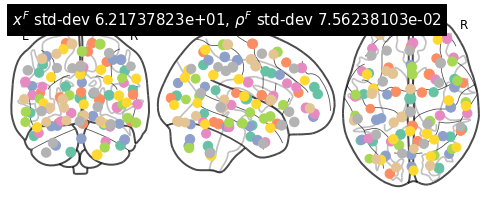

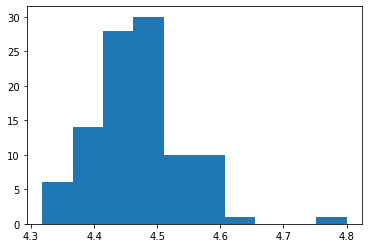

(<nilearn.plotting.displays.OrthoProjector at 0x7f2ee21b72e0>,
 tensor([[  0.2959, -14.5327,   8.0082],
         [ 30.4819, -87.8441,  10.8278],
         [ 24.8636,  -8.0098, -20.1976],
         [-52.1640, -58.7490,  -7.7520],
         [-15.3230,  57.1722,  19.9614],
         [ 55.2367, -46.7452,  16.7166],
         [ 46.9099,   5.8351,  36.6814],
         [-39.1213, -59.6745,  43.2867],
         [ 13.9697,  60.7649,  12.7119],
         [-48.6624, -10.0031, -32.1243],
         [ -9.8831, -52.3770, -48.9821],
         [-43.1778,  11.9990,  34.6058],
         [ 42.4120, -54.7595, -41.9658],
         [-41.7224, -25.3223,  13.6628],
         [-14.9151,  -7.5537,  65.5075],
         [  8.1895, -59.4595,  56.9049],
         [ 27.8079,  27.5939,  45.9432],
         [  2.5869, -43.4787, -18.7472],
         [ 55.5741,   1.8150,  11.5430],
         [ 20.2635,  10.8328,   6.4017],
         [-21.2392, -93.6930,   8.5147],
         [  1.0447,  40.4520,  14.1329],
         [ 53.3073, -48.6207, -16.7

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

14

In [9]:
dtfa.num_voxels

142880

In [10]:
dtfa.load_state('sub-CHECK_09172023_063656_Epoch2000')

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


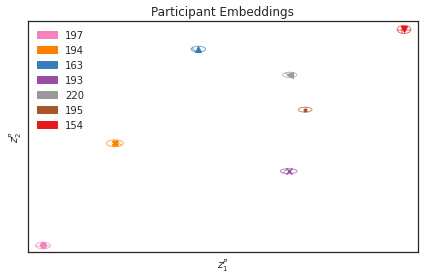

In [11]:
dtfa.scatter_subject_weight_embedding(figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding.pdf')

09/17/2023 13:38:15 Plotting factors for Participant 154, run 0


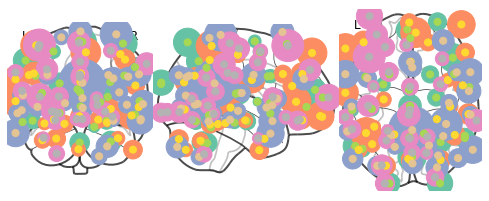

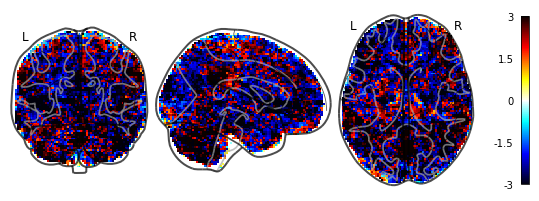

09/17/2023 13:39:05 Reconstruction Error (Frobenius Norm): 4.18993622e+02 out of 4.58702423e+02


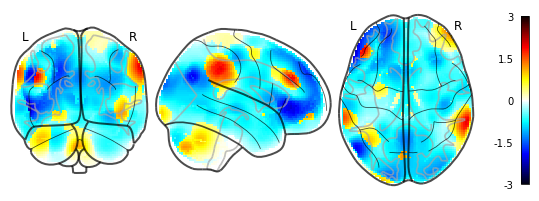

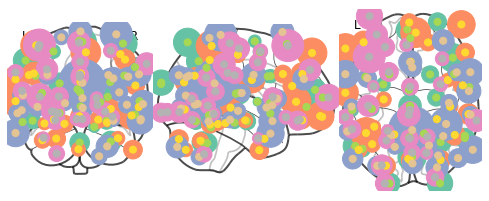

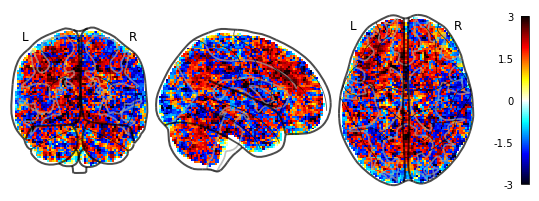

09/17/2023 13:39:57 Reconstruction Error (Frobenius Norm): 2.92430908e+02 out of 3.15390045e+02


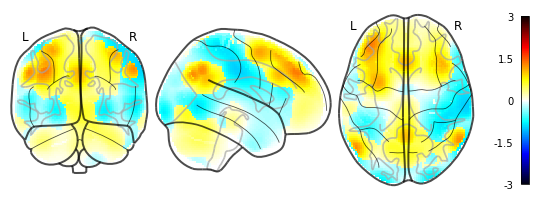

In [12]:
subject_runs = spreng_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in spreng_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index,)
        dtfa.plot_original_brain(index,)
        dtfa.plot_reconstruction(index,)

In [21]:
def subject_labeler(subject):
    return 'Subject %d' % subject

def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._dataset.blocks.items():
        if subject_labeler(b[1]['subject']) == subject_label:
            yield b
            
def subject_weights(subject_label, subject_labeler=subject_labeler):
    for (b, W) in enumerate(dtfa.variational.hyperparams.state_vardict()['weights__mu']):
        if subject_labeler(dtfa._dataset.blocks[b]['subject']) == subject_label:
            yield W

def subject_age_group(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['agegroup']:
            yield b[1]['individual_differences']['agegroup']
            
def subject_agegroup_labeler(subject):
    subject_group = [group for group in subject_age_group(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

In [14]:
def subject_sex_group(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['sex']:
            yield b[1]['individual_differences']['sex']
            
def subject_sex_labeler(subject):
    subject_group = [group for group in subject_sex_group(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

In [15]:
def subject_age(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['age']:
            yield b[1]['individual_differences']['age']
            
def subject_age_labeler(subject):
    subject_group = [group for group in subject_age(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

In [16]:
def subject_education(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['education']:
            yield b[1]['individual_differences']['education']
            
def subject_education_labeler(subject):
    subject_group = [group for group in subject_education(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


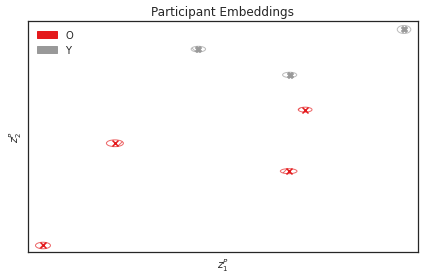

In [17]:
dtfa.scatter_subject_weight_embedding(labeler=subject_agegroup_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_label.pdf')

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


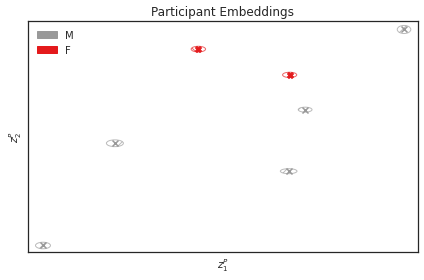

In [18]:
dtfa.scatter_subject_weight_embedding(labeler=subject_sex_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_label_sex.pdf')

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


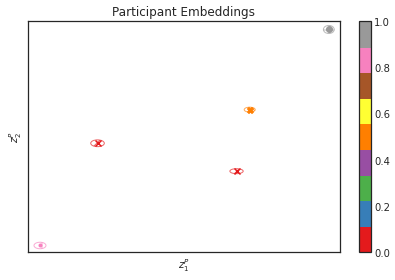

In [19]:
dtfa.scatter_subject_weight_embedding(labeler=subject_education_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_label_education.pdf')

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


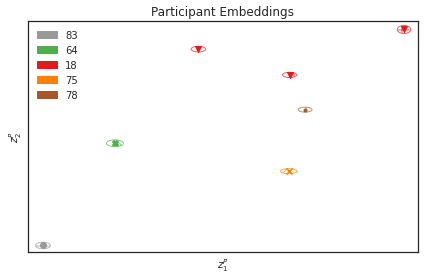

In [20]:
dtfa.scatter_subject_weight_embedding(labeler=subject_age_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_label_age.pdf')

In [22]:
all_subject_weight_blocks = {key:None for key in dtfa._subjects}
all_subject_correlations = {key: None for key in dtfa._subjects}
all_subject_mean_correlations = {key: None for key in dtfa._subjects}
all_sujbect_std_correlations = {key: None for key in dtfa._subjects}

for s in dtfa._subjects:
    print ("Processing Subject " + str(s))
    all_subject_weight_blocks[s] = [weights for weights in subject_weights(s, lambda x: x)]
    all_subject_correlations[s] = np.array([utils.get_correlation_matrix(weights.T.data.numpy(), 
                                                         weights.T.data.numpy()) 
                                            for weights in all_subject_weight_blocks[s]])
    all_subject_mean_correlations[s] = all_subject_correlations[s].mean(axis=0)
    all_sujbect_std_correlations[s] = all_subject_correlations[s].std(axis=0)

Processing Subject 193
Processing Subject 194
Processing Subject 195
Processing Subject 197
Processing Subject 154
Processing Subject 163
Processing Subject 220


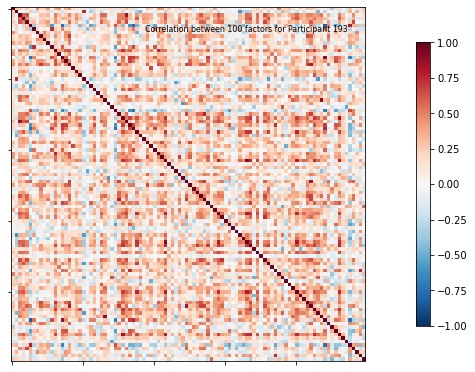

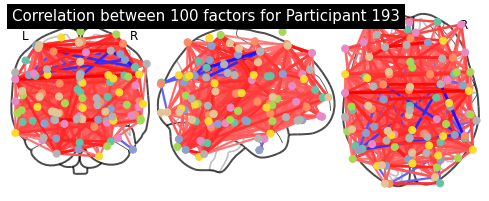

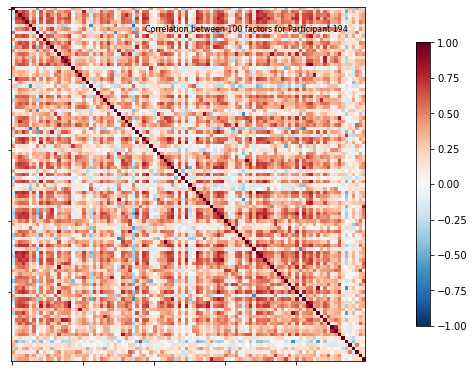

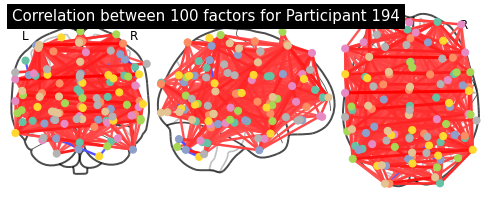

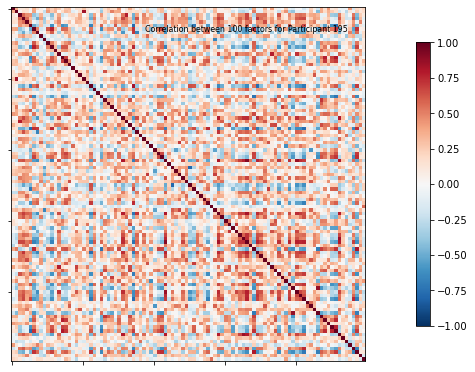

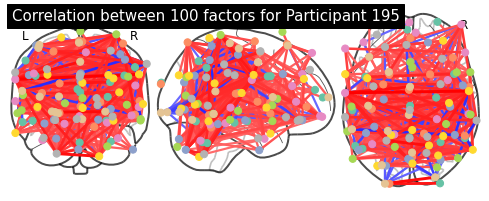

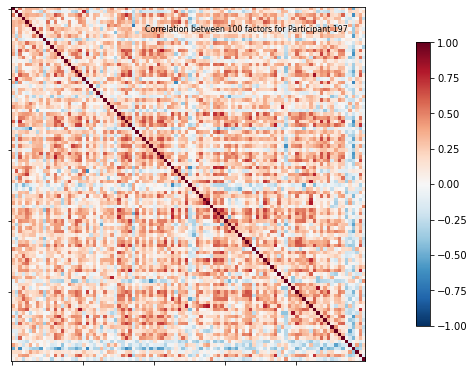

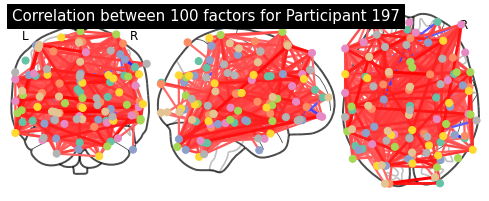

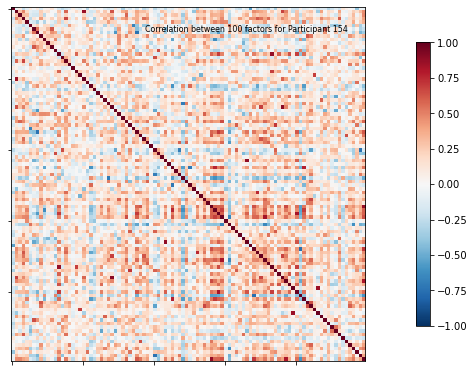

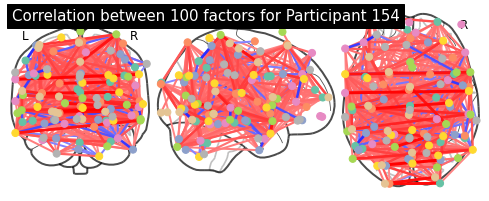

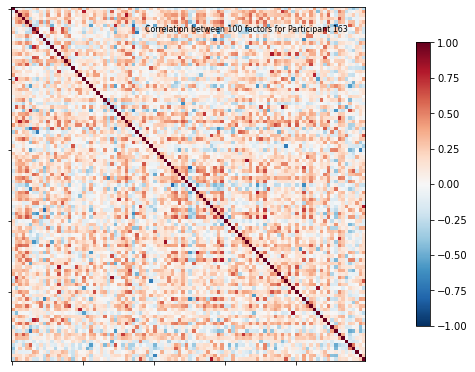

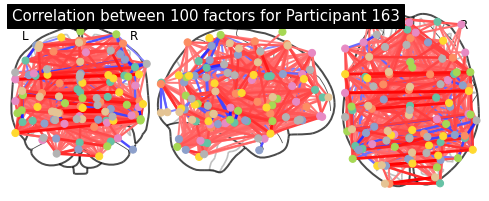

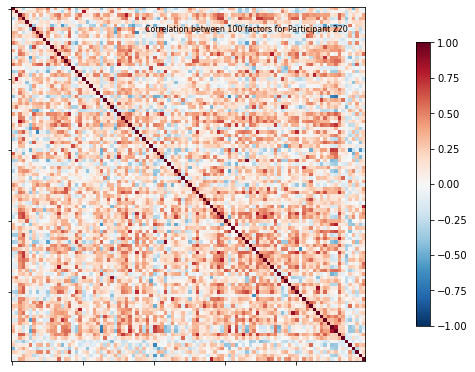

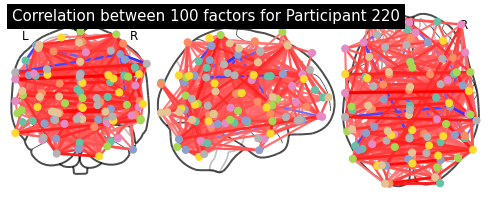

In [34]:
all_factor_centers = dtfa.variational.hyperparams.state_vardict()['template_factor_centers__mu'].data.numpy()
for s in dtfa._subjects:
    title = f"Correlation between {int(dtfa.num_factors)} factors for Participant {s}"

    # First plot the matrix
    display = niplot.plot_matrix(
        all_subject_mean_correlations[s], vmax=1, vmin=-1, colorbar=True, title=title
    )


    niplot.plot_connectome(
        all_subject_mean_correlations[s], all_factor_centers, edge_threshold="90%", title=title
    )

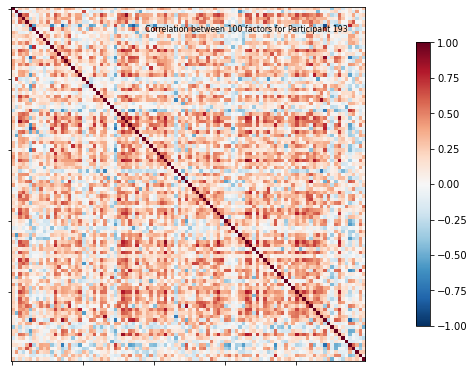

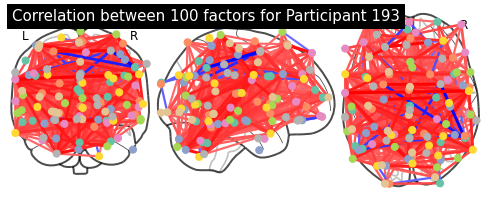

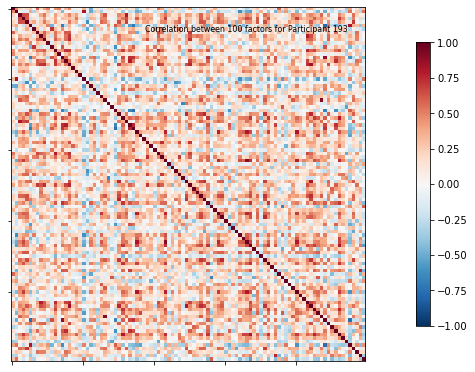

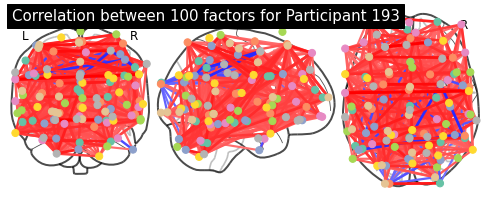

In [35]:
s = 193
for subject_corrs in all_subject_correlations[s]:
    title = f"Correlation between {int(dtfa.num_factors)} factors for Participant {s}"

    # First plot the matrix
    display = niplot.plot_matrix(
        subject_corrs, vmax=1, vmin=-1, colorbar=True, title=title
    )


    niplot.plot_connectome(
        subject_corrs, all_factor_centers, edge_threshold="90%", title=title
    )

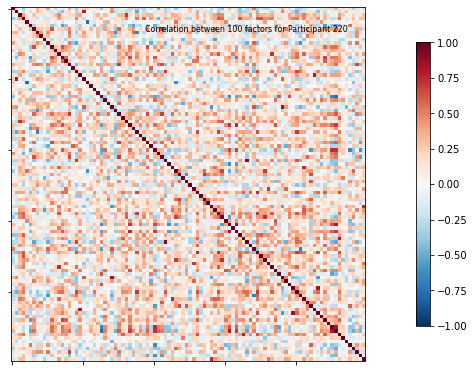

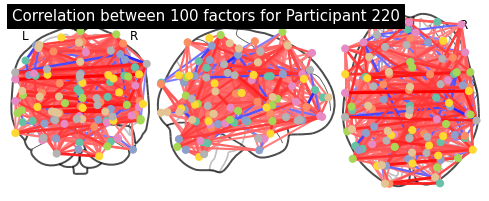

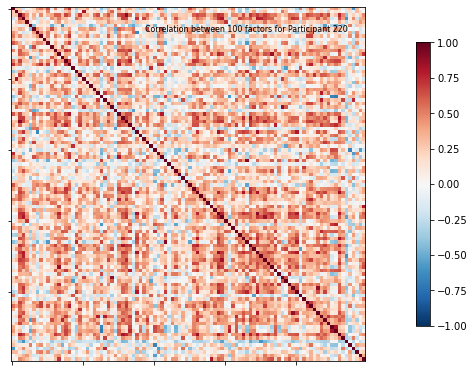

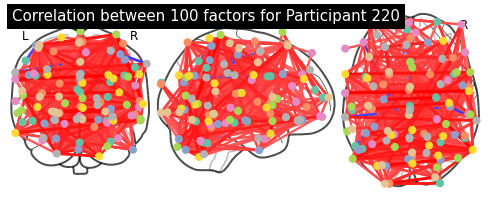

In [36]:
s = 220
for subject_corrs in all_subject_correlations[s]:
    title = f"Correlation between {int(dtfa.num_factors)} factors for Participant {s}"

    # First plot the matrix
    display = niplot.plot_matrix(
        subject_corrs, vmax=1, vmin=-1, colorbar=True, title=title
    )


    niplot.plot_connectome(
        subject_corrs, all_factor_centers, edge_threshold="90%", title=title
    )

In [30]:
all_factor_centers.min(axis=0)

array([ -68.33236 , -104.27316 ,  -53.390175], dtype=float32)